In [54]:
import numpy as np
import matplotlib.pyplot as plt

In [55]:
x = np.empty((100,2))
np.random.seed = 666
x[:,0] = np.random.uniform(0.,100., size = 100)
x[:,1] = 0.75 * x[:,0] + 3. + np.random.normal(0, 10., size =100)

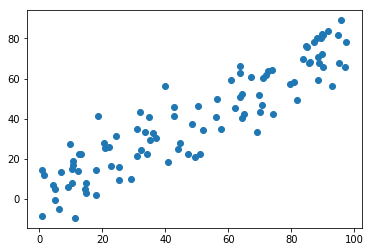

In [56]:
plt.scatter(x[:,0],x[:,1])
plt.show()

# demean

In [57]:
def demean(x):
    return x - np.mean(x , axis=0 )

In [58]:
x_demean = demean(x)

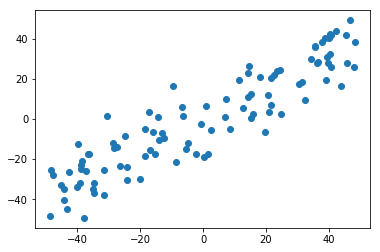

In [59]:
plt.scatter(x_demean[:,0],x_demean[:,1])
plt.show()

# 梯度上升法

In [60]:
def f(w ,x):
    return np.sum((x.dot(w)**2))/len(x)

In [61]:
def df_math(w, x):
    return x.T.dot(x.dot(w))* 2./len(x)

In [62]:
def direction(w):#换成单位向量
    return w / np.linalg.norm(w) 
def grandient_ascent(df, x, initial_w, eta, n_iters=1e4,epsilon =1e-8):
    #w方向向量
    w = direction(initial_w)
    cur_iter = 0
    
    while cur_iter<n_iters:
        gradient = df(w, x)
        last_w = w
        w = w + eta * gradient
        w = direction(w) #注意每次求一个单位方向
        if(abs(f(w, x) - f(last_w, x))< epsilon):
            break
            
        cur_iter +=1
    
    return w

In [63]:
initial_w = np.random.random(x.shape[1]) #不能从零开始

In [64]:
eta = 0.001

In [65]:
#数据归一化  不能用standardScale  

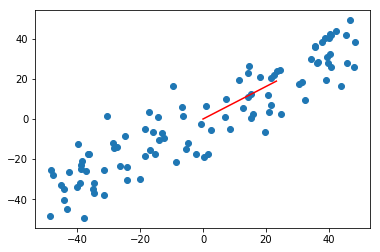

In [66]:
w = grandient_ascent(df_math, x_demean,initial_w,eta)
plt.scatter(x_demean[:,0],x_demean[:,1])
plt.plot([0, w[0]*30],[0,w[1]*30], color ='r')
plt.show()


# 求前n个主成分

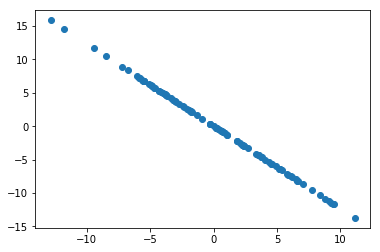

In [69]:
x2 = np.empty(x.shape)
for i in range(len(x)):
    x2[i] = x[i] - x[i].dot(w) * w
    
#向量化写法：  x2 = x - x.dot(w).reshape(-1, 1) * w
plt.scatter(x2[:,0],x2[:,1])
plt.show()

In [70]:
w2 = grandient_ascent(df_math, x2,initial_w,eta)
w2

array([-0.62958491,  0.77693168])

In [71]:
w.dot(w2)

2.2223440951818496e-05

In [74]:
def first_n_components(n, x, eta=0.01, n_iters = 1e4, epsilon=1e-8):
    x_pca = x.copy()
    x_pca = demean(x_pca)
    res = []
    for i in range(n):
        initial_w = np.random.random(x_pca.shape[1])
        w = grandient_ascent(df_math, x_pca,initial_w,eta)
        res.append(w)
        
        x_pca = x_pca- x_pca.dot(w).reshape(-1, 1) * w
        
    return res

In [75]:
first_n_components(2,x)

[array([0.77691812, 0.62960164]), array([ 0.62960466, -0.77691568])]

# scikit-learn中的PCA

In [76]:
from sklearn.decomposition import PCA

In [77]:
pca = PCA(n_components=1)

In [82]:
x = np.empty((100,2))
x[:,0] = np.random.uniform(0.,100.,size = 100)
x[:,1] = 0.75 * x[:,0] + 3 + np.random.normal(0,10.,size=100)

In [83]:
pca.fit(x)

PCA(copy=True, iterated_power='auto', n_components=1, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [88]:
x_reduction = pca.transform(x)

In [91]:
x_reduction.shape

(100, 1)

In [92]:
pca.components_

array([[0.77030989, 0.63766973]])

In [93]:
x_restore = pca.inverse_transform(x_reduction)
x_restore.shape

(100, 2)

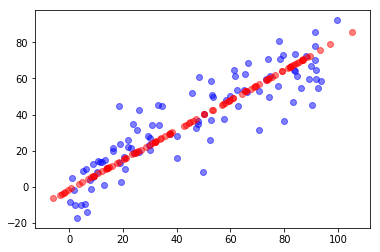

In [94]:
plt.scatter(x[:,0],x[:,1],color='b',alpha=0.5)
plt.scatter(x_restore[:,0],x_restore[:,1],color='r',alpha=0.5)
plt.show()

In [95]:
from sklearn import datasets

digits = datasets.load_digits()
x = digits.data
y = digits.target



In [96]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=666)

In [97]:
x_train.shape

(1437, 64)

In [157]:
%%time
from sklearn.neighbors import KNeighborsClassifier
kNN_classifier=KNeighborsClassifier(n_neighbors=3)
kNN_classifier.fit(x_train,y_train)

Wall time: 6 ms


In [158]:
kNN_classifier.score(x_test,y_test)

0.9888888888888889

In [159]:
##pca降维
from sklearn.decomposition import PCA


pca = PCA(n_components=2)
pca.fit(x_train)
x_train_reduction = pca.transform(x_train)
x_test_reduction = pca.transform (x_test)

In [160]:
%%time
kNN_classifier=KNeighborsClassifier(n_neighbors=3)
kNN_classifier.fit(x_train_reduction,y_train)

Wall time: 3 ms


In [161]:
kNN_classifier.score(x_test_reduction,y_test)

0.6027777777777777

In [162]:
pca.explained_variance_ratio_

array([0.1450646 , 0.13714246])

In [163]:
pca = PCA(n_components=x_train.shape[1])
pca.fit(x_train)
pca.explained_variance_ratio_

array([1.45064600e-01, 1.37142456e-01, 1.19680004e-01, 8.43768923e-02,
       5.87005941e-02, 5.01797333e-02, 4.34065700e-02, 3.61375740e-02,
       3.39661991e-02, 3.00599249e-02, 2.38906921e-02, 2.29417581e-02,
       1.81335935e-02, 1.78403959e-02, 1.47411385e-02, 1.41290045e-02,
       1.29333094e-02, 1.25283166e-02, 1.01123057e-02, 9.08986879e-03,
       8.98365069e-03, 7.72299807e-03, 7.62541166e-03, 7.09954951e-03,
       6.96433125e-03, 5.84665284e-03, 5.77225779e-03, 5.07732970e-03,
       4.84364707e-03, 4.34595748e-03, 3.73352381e-03, 3.57655938e-03,
       3.30727680e-03, 3.18129431e-03, 3.06969704e-03, 2.89170006e-03,
       2.51205204e-03, 2.27743660e-03, 2.22760483e-03, 2.00065017e-03,
       1.89529684e-03, 1.56877138e-03, 1.42740894e-03, 1.39115781e-03,
       1.20896097e-03, 1.10149976e-03, 9.81702199e-04, 8.82376601e-04,
       5.69898729e-04, 4.10322729e-04, 2.32125043e-04, 8.49807543e-05,
       5.37426557e-05, 5.27990816e-05, 1.03398093e-05, 6.20749843e-06,
      

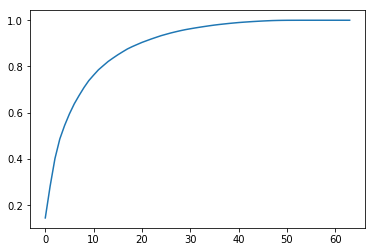

In [164]:
plt.plot([i for i in range(x_train.shape[1])],
        [np.sum(pca.explained_variance_ratio_[:i+1]) for i in range(x_train.shape[1])])

In [165]:
pca = PCA(0.95)
pca.fit(x_train)
pca.n_components_
x_train_reduction = pca.transform(x_train)
x_test_reduction = pca.transform(x_test)

In [166]:
%%time
kNN_classifier=KNeighborsClassifier(n_neighbors=3)
kNN_classifier.fit(x_train_reduction,y_train)

Wall time: 3 ms


In [167]:
kNN_classifier.score(x_test_reduction,y_test)

0.9805555555555555

In [168]:
##高维数据可视化

pca = PCA(n_components=2)
pca.fit(x)
x_reduction = pca.transform(x)
x_reduction.shape

(1797, 2)

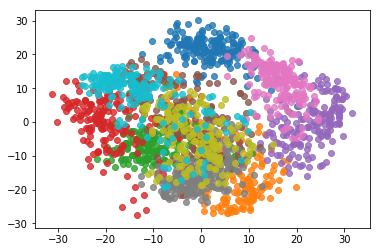

In [169]:
for i in range(10):
    plt.scatter(x_reduction[y==i,0],x_reduction[y==i,1],alpha=0.8)
plt.show()

# 使用pca降噪

In [174]:
from sklearn import datasets

digits = datasets.load_digits()
x = digits.data
y = digits.target

In [175]:
noisy_digits = x + np.random.normal(0,4,size=x.shape)

In [176]:
noisy_digits

array([[-3.34562985,  0.92429525,  8.56959914, ..., -1.36688864,
         3.08421704,  1.18421033],
       [ 0.82281536, -3.0101982 ,  0.67348372, ...,  7.36526867,
        -5.0249469 , -0.98482302],
       [-2.05316097, -1.24299653,  4.0447861 , ..., 23.94692117,
        11.48019551,  1.40483785],
       ...,
       [-1.04093564,  3.76913523,  8.26216725, ..., 11.10670748,
        -1.98740832,  6.62293114],
       [ 4.0369753 , -0.52183191, -0.51904007, ..., 16.03699449,
         1.6886293 ,  5.01387488],
       [-2.52951164, -0.26442814,  8.7335436 , ..., 14.05257487,
         3.34967634,  3.92008817]])

In [177]:
example_digits = noisy_digits[y==0,:][:10]
for num in range(1,10):
    x_num = noisy_digits[y==num,:][:10]
    example_digits = np.vstack([example_digits, x_num])

In [179]:
example_digits.shape

(100, 64)

In [182]:
def plot_digits(data):
    fig,axes = plt.subplots(10, 10, figsize=(10, 10),
                           subplot_kw={'xticks':[],'yticks':[]},
    gridspec_kw=dict(hspace=0.1,wspace=0.1))
    for i,ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8, 8),
                 cmap='binary',interpolation='nearest',clim=(0,16))

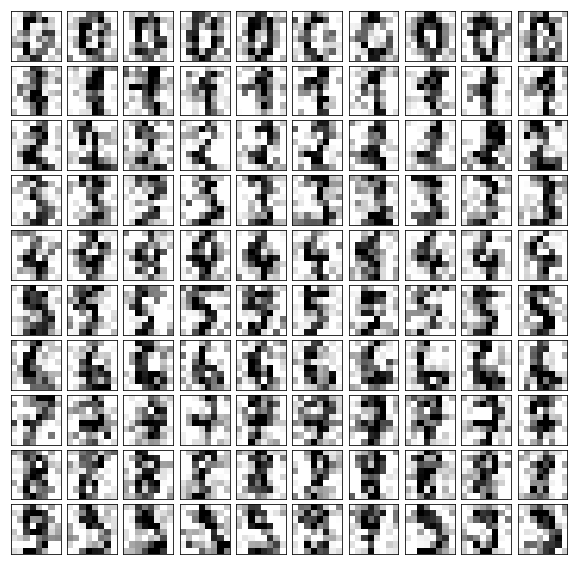

In [183]:
plot_digits(example_digits)

In [189]:
# example_digits = x[y==0,:][:10]
# for num in range(1,10):
#     x_num = noisy_digits[y==num,:][:10]
#     example_digits = np.vstack([example_digits, x_num])
# plot_digits(example_digits)

In [200]:
pca = PCA(0.5)
pca.fit(noisy_digits)

PCA(copy=True, iterated_power='auto', n_components=0.5, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [201]:
pca.n_components_

12

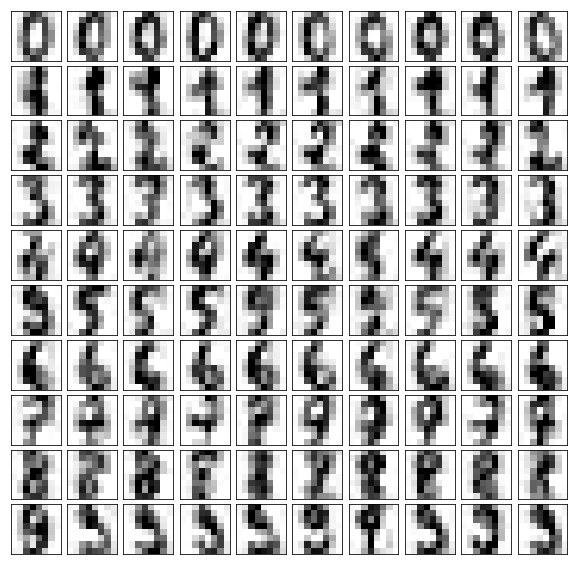

In [202]:
components = pca.transform(example_digits)
filltered_digits = pca.inverse_transform(components)
plot_digits(filltered_digits)

# 人脸识别特征脸